In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [43]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
file_path = "/content/drive/MyDrive/OutputCluster.xlsx"
df = pd.read_excel(file_path)

In [45]:
# Menampilkan beberapa baris pertama untuk melihat struktur dataset
print(df.head())


   Unnamed: 0             VARIAN NAME  FORMULA  AQUADEST  ALKOHOL  UKURAN  \
0           1           BONJOUR AMBRE    12.69       5.0    82.31    30.0   
1           6  BONJOUR COTTON SPARKLE    12.24       5.0    82.76    30.0   
2           9       BONJOUR FAIRYTALE    10.79       5.0    84.21    30.0   
3          11   BONJOUR FOREVER YOUNG    13.04       5.0    81.96    30.0   
4          14       BONJOUR GREEN TEA    12.00       5.0    83.00    30.0   

    HARGA  Labels  
0  149400       0  
1  149200       0  
2  148500       0  
3  149500       0  
4  149000       0  


In [46]:
# Pastikan dataset memiliki kolom cluster/labels
if 'Labels' not in df.columns:
    raise ValueError("Dataset tidak memiliki kolom 'Labels'. Pastikan data sudah dikelompokkan sebelumnya.")

In [47]:
# Memeriksa apakah ada nilai yang hilang
print("\nCek nilai yang hilang:")
print(df.isnull().sum())



Cek nilai yang hilang:
Unnamed: 0     0
VARIAN NAME    0
FORMULA        0
AQUADEST       0
ALKOHOL        0
UKURAN         0
HARGA          0
Labels         0
dtype: int64


In [48]:
# Pastikan kolom yang digunakan sesuai dengan dataset
# Ubah nama kolom jika tidak sesuai
columns_required = ['FORMULA', 'AQUADEST', 'ALKOHOL', 'HARGA', 'Labels']  # Sesuaikan nama kolom
df = df[columns_required]



In [49]:
# Memilih fitur (X) dan target (y)
X = df[['FORMULA', 'AQUADEST', 'ALKOHOL', 'Labels']]
y = df['HARGA']


In [50]:
# One-Hot Encoding untuk cluster
encoder = OneHotEncoder(sparse_output=False, drop='first')
  # Hilangkan dummy pertama untuk menghindari multikolinearitas
X_encoded = encoder.fit_transform(df[['Labels']])

# Gabungkan dengan fitur lain
X_final = np.hstack((df[['FORMULA', 'AQUADEST', 'ALKOHOL']].values, X_encoded))

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

In [51]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi harga di data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [52]:
print(f"\nMean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Mean Squared Error (MSE): 27039022.72871919
R-squared (R²): 0.9227830885175982


In [53]:
# Menampilkan koefisien regresi
print("\nKoefisien regresi:", model.coef_)
print("Intercept:", model.intercept_)


Koefisien regresi: [ -993.04704539  -180.36317457  1133.04538286 27428.37855062
 16156.5651655 ]
Intercept: 189868.69827687825


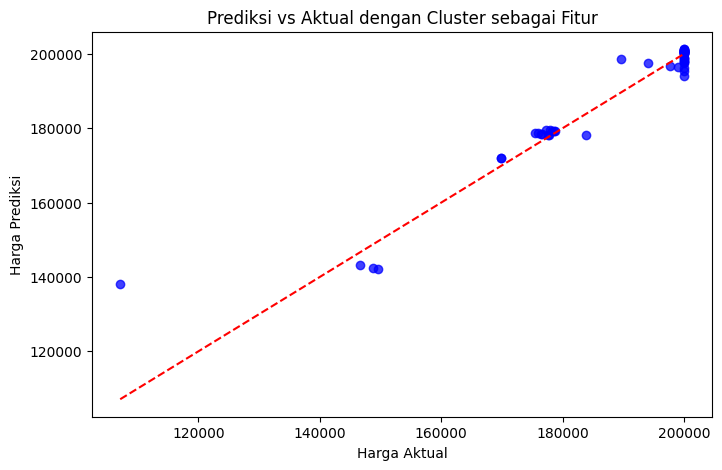

In [54]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.75, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Garis ideal
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Aktual dengan Cluster sebagai Fitur")
plt.show()